In [201]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation
 

#### Read the dataset 
- concatnate the data with normal and attack   

In [202]:
# import data set from the local driver 
dff=pd.read_csv('SWaT_Dataset_Normal_v0.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp') 
df=pd.read_csv('SWaT_Dataset_Attack_v0 - Copy.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp')
frames = [dff,df] 
df_concat=pd.concat(frames) 
df_concat.head(5)    

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


#### Automatic Sensor data extraction 

In [203]:
# # select sensor data 
df1=df_concat.filter(regex='(^Time|^PIT|^AIT|^FIT|^DPI|^LIT|^Norma)',axis=1)#.head()
df1.head()
df1.shape  

(946719, 27)

In [204]:
# remove the space on Normal/Attack columns 
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')  
#To see how the data is spread betwen Attack and Normal 
print(df1.groupby('Normal/Attack')['Normal/Attack'].count())  
# Rename the col name Normal/Attack with A   
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2)   

Normal/Attack
Attack     54621
Normal    892098
Name: Normal/Attack, dtype: int64


/tmp/ipykernel_139989/3146584869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')
/tmp/ipykernel_139989/3146584869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)


,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,22/12/2015 4:00:00 PM,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,Normal


In [205]:
# Convert non-numeric to numeric

df1.A[df1.A== 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1    
df1.head() 

/tmp/ipykernel_139989/3056417269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A== 'Normal'] = 0
/tmp/ipykernel_139989/3056417269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A== 'Normal'] = 0
/tmp/ipykernel_139989/3056417269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Attack'] = 1
/tmp/ipykernel_139989/3056417269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,22/12/2015 4:00:00 PM,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
1,22/12/2015 4:00:01 PM,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
2,22/12/2015 4:00:02 PM,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
3,22/12/2015 4:00:03 PM,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0
4,22/12/2015 4:00:04 PM,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0


In [206]:
# convert the data type to float 
df1['A'] = df1['A'].astype('float')   

/tmp/ipykernel_139989/3758672493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['A'] = df1['A'].astype('float')


In [207]:
# make the Timestamp to datetime datatype 
df1['Timestamp'] = pd.to_datetime(df1['Timestamp']) # conveting the date time stamp to the timestamp series 
df1.head() 
# # df1.shape

#df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])  

#df1.head() 

/tmp/ipykernel_139989/132667980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Timestamp'] = pd.to_datetime(df1['Timestamp']) # conveting the date time stamp to the timestamp series


,Timestamp,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
1,2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2,2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
3,2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
4,2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0


In [208]:
# make Timestamp feature  as index 
df1= df1.set_index('Timestamp') 
df1.head()  

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,244.3284,8.19008,306.101,2.471278,20.79839,2.235275,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:01,2.457163,261.1879,244.3284,8.19008,306.101,2.468587,20.79839,2.234507,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:02,2.439548,260.9131,244.3284,8.19008,306.101,2.467305,20.84320,2.233354,327.4401,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:03,2.428338,260.2850,244.3284,8.19008,306.101,2.466536,20.84320,2.233354,327.2799,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:04,2.424815,259.8925,244.4245,8.19008,306.101,2.466536,20.84320,2.233354,327.1597,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0


### resample the data with 5 second 
##### Interpolation the data with each time stamp

In [209]:
df1=df1.resample('5s').mean()
df1.interpolate(method='polynomial',order=2)
df1.head()  

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.444032,260.77178,244.34762,8.190080,306.10100,2.468048,20.825276,2.233969,327.35198,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:05,2.513980,260.59906,244.62956,8.190080,306.10100,2.467741,20.831038,2.234686,326.95144,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:10,2.641322,261.67458,244.87950,8.190080,306.05486,2.473072,20.827198,2.234302,326.47080,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:15,2.597893,261.05440,245.03330,8.190080,305.87030,2.473969,20.870094,2.235147,327.78456,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0
2015-12-22 16:00:20,2.521731,262.10636,245.44990,8.190849,305.87030,2.472970,20.836804,2.235147,328.58562,0.0,...,12.68905,0.001666,0.001409,0.001664,0.0,10.02948,0.0,4.277749,0.000256,0.0


In [210]:
df1.shape 

(707760, 26)

In [211]:
# Count NaN values of whole DataFrame
nan_count = df1.isna().sum()#.sum()
print(nan_count ) 

FIT101     518415
LIT101     518415
AIT201     518415
AIT202     518415
AIT203     518415
FIT201     518415
DPIT301    518415
FIT301     518415
LIT301     518415
AIT401     518415
AIT402     518415
FIT401     518415
LIT401     518415
AIT501     518415
AIT502     518415
AIT503     518415
AIT504     518415
FIT501     518415
FIT502     518415
FIT503     518415
FIT504     518415
PIT501     518415
PIT502     518415
PIT503     518415
FIT601     518415
A          518415
dtype: int64


In [212]:
df1.fillna(method = 'ffill', inplace = True)

In [213]:
#To see how the data is spread betwen Attack and Normal after interpolation 
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 
print(df1.groupby('A')['A'].count())    

A
0.0    696805
0.2        22
0.4        12
0.6         9
0.8        12
1.0     10900
Name: A, dtype: int64


In [214]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['A'] >= 0.1, 'lablel'] = 1 
df1.loc[df1['A'] ==0.0, 'lablel'] = 0   

In [215]:
# fill the missing values with forward and backward of the cols 

df1=df1.fillna(method="ffill") 

In [216]:
print(df1.groupby('lablel')['lablel'].count())   

lablel
0.0    696805
1.0     10955
Name: lablel, dtype: int64


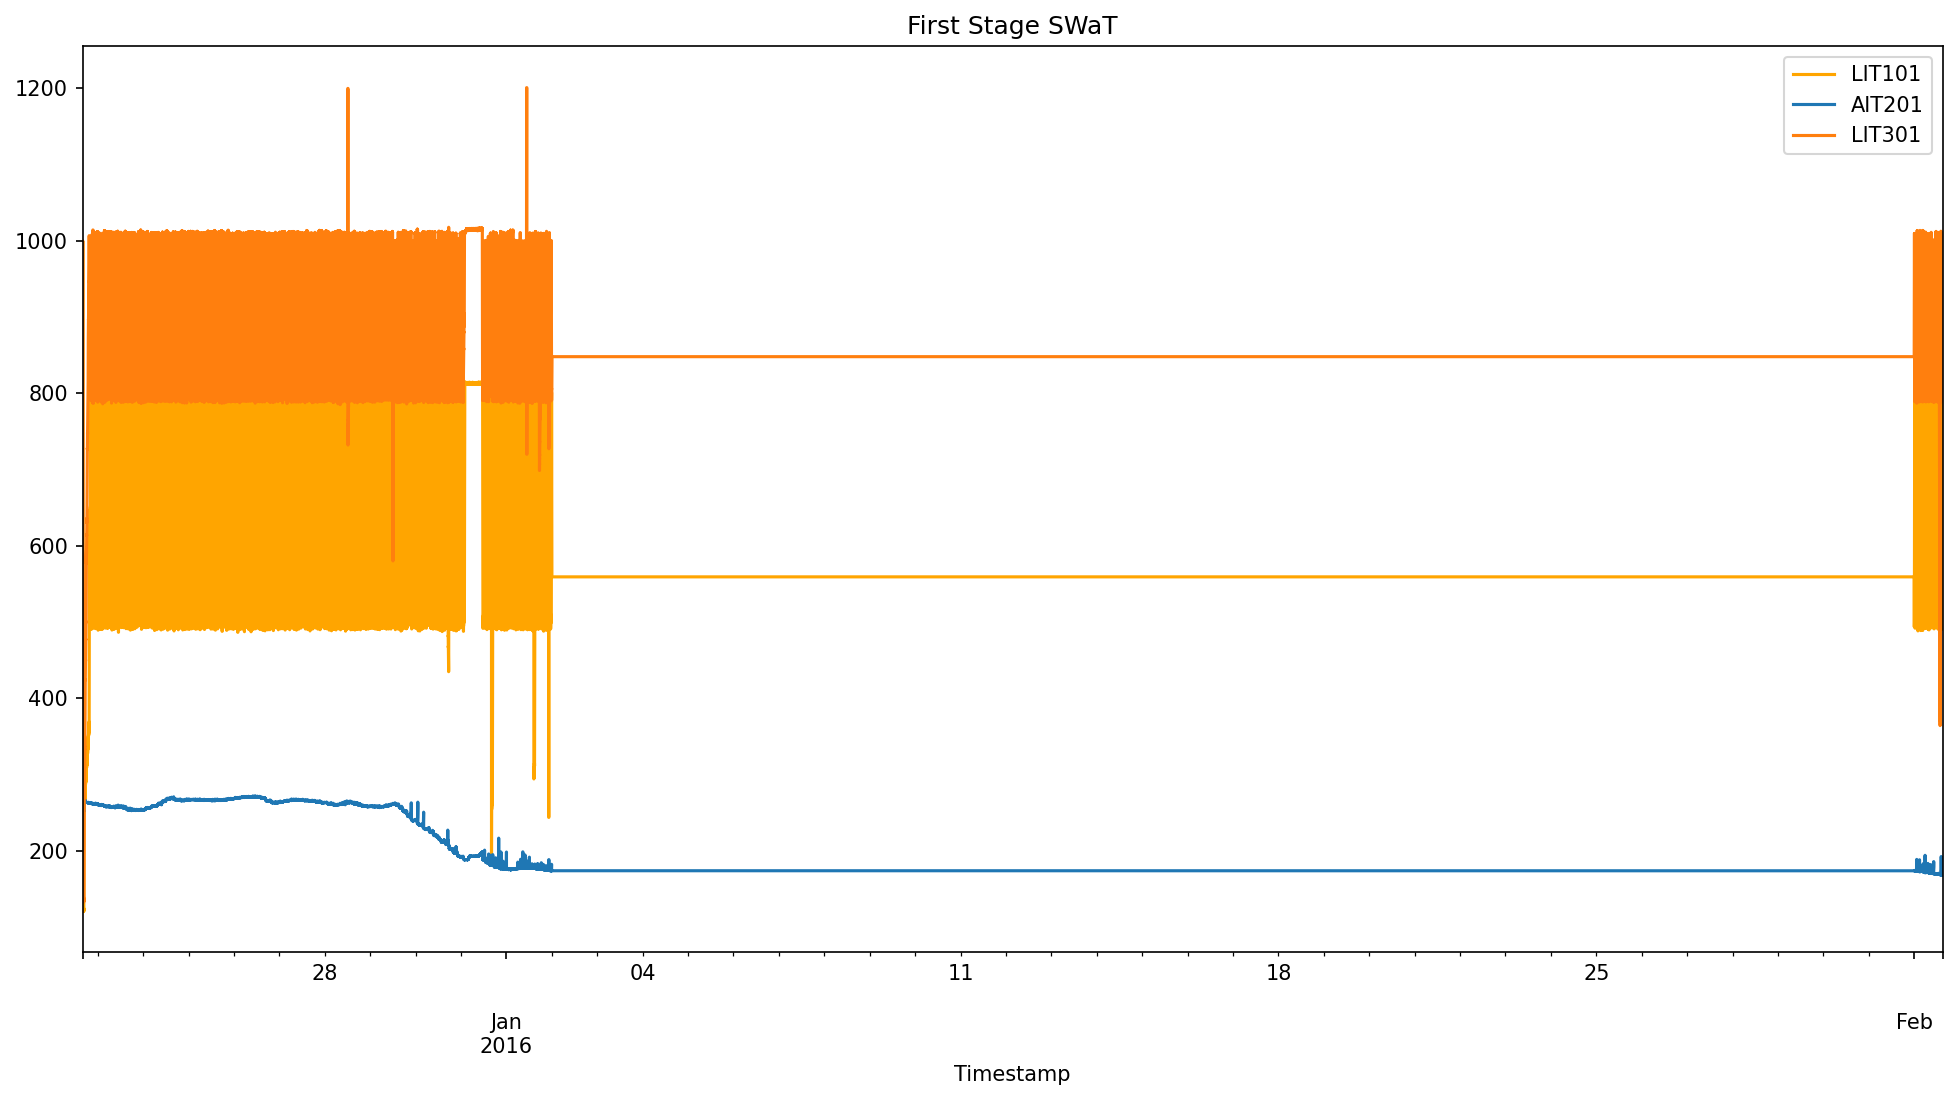

In [217]:
# code
# Visualizing The first stage with respect to time series 
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
#df1['FIT101'].plot(label='FIT101')
df1['LIT101'].plot(label='LIT101', color='orange')
df1['AIT201'].plot(label='AIT201')

df1['LIT301'].plot(label='LIT301')

# adding title to the plot
plt.title('First Stage SWaT')
# adding Label to the x-axis
plt.xlabel('Timestamp')  
# adding legend to the curve
plt.legend()    

In [218]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['A'] >= 0.2, 'lablel'] = 1 
df1.loc[df1['A'] ==0.0, 'lablel'] = 0  

In [219]:
# fill the missing values with forward and backward of the cols 

df1=df1.fillna(method="ffill")  

In [220]:
print(df1.groupby('lablel')['lablel'].count())   

lablel
0.0    696805
1.0     10955
Name: lablel, dtype: int64


In [221]:
df1= df1.drop('A', axis=1)  

#### Visualize the dataset 
-  Plotting the number of normal and Attack transactions in the dataset.  

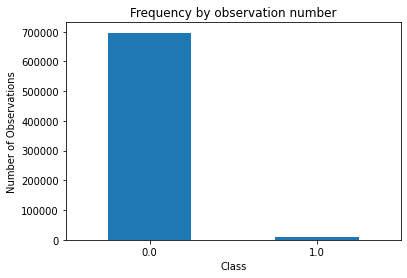

In [222]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1['lablel'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");     

#### Normalize using min Max scaler   

In [223]:
# # For content length, use the Min max Scalar.  
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
            'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
            'PIT501','PIT502','PIT503','FIT601'] 
scaler = MinMaxScaler() 
df1[con_feats] = scaler.fit_transform(df1[con_feats])
df1.head()   

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,lablel
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,0.894293,0.159184,0.731315,0.732954,0.073596,0.873447,0.462669,0.948655,0.181982,0.0,...,0.012461,0.000803,0.000797,0.002182,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:05,0.919888,0.158988,0.734017,0.732954,0.073596,0.873338,0.462797,0.948960,0.181607,0.0,...,0.012461,0.000803,0.000797,0.002182,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:10,0.966483,0.160211,0.736412,0.732954,0.073433,0.875225,0.462712,0.948797,0.181156,0.0,...,0.012461,0.000803,0.000797,0.002182,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:15,0.950592,0.159506,0.737886,0.732954,0.072778,0.875542,0.463665,0.949156,0.182387,0.0,...,0.012461,0.000803,0.000797,0.002182,0.0,0.004448,0.0,0.005921,0.000142,0.0
2015-12-22 16:00:20,0.922724,0.160702,0.741878,0.733212,0.072778,0.875188,0.462925,0.949156,0.183137,0.0,...,0.012461,0.000803,0.000797,0.002182,0.0,0.004448,0.0,0.005921,0.000142,0.0


#### Split the Data to train and Test 

In [224]:
# Train test split (80/20 %) 
X_train, X_test, y_train, y_test = train_test_split(df1,df1['lablel'],test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
 

The number of records in the training dataset is 566208
The number of records in the test dataset is 141552


In [225]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(566208, 26)
(141552, 26)
(566208,)
(141552,)


#### Hyperparameter tuning for 5 second logs using Isolation forest SWaT   

In [226]:
from sklearn import model_selection 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, f1_score 
clf = IsolationForest(random_state=47)

param_grid = {'n_estimators': [5,10,20,30,40],#list(range(100, 800)),#, 5)), 
              'max_samples': [5,10,20,30,40], #list(range(100, 500)),#, 5)), 
              'contamination': [0.1, 0.2, 0.3, 0.4],# 0.5], 
              'max_features': [5,10,15], 
              #'bootstrap': [True, False], 
              #'n_jobs': [5, 10, 20, 30]
             }

f1sc = make_scorer(f1_score, average='micro')

grid_search = model_selection.GridSearchCV(clf, 
                                                 param_grid,                                                  
                                                 refit=True,
                                                 scoring=f1sc,
                                                 cv=10, 
                                                 return_train_score=True)
#grid_dt_estimator.fit(X_train, X_test)

best_model = grid_search.fit(X_train.values, y_train) 

print('Optimum parameters', best_model.best_params_)    

Optimum parameters {'contamination': 0.1, 'max_features': 5, 'max_samples': 5, 'n_estimators': 5}


#### Train Isolation Forest Model 

In [188]:
# Model and performance
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

In [239]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=5,max_features=5,max_samples=5,contamination=0.1,random_state=47).fit(X_train)
# Predict the anomalies
if_prediction = if_model.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
 

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


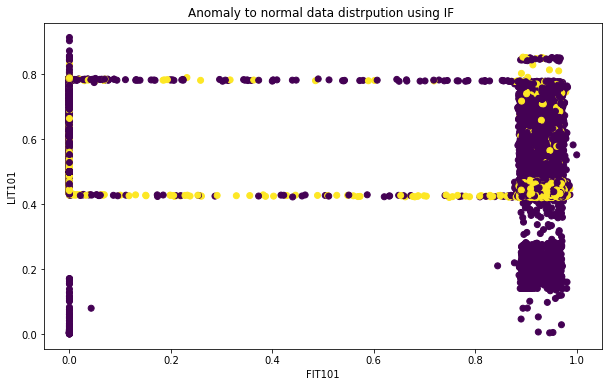

In [240]:
# visualize the anomaly points in the dataset with 2D
plt.figure(figsize=(10,6)) 
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=if_prediction)
plt.title("Anomaly to normal data distrpution using IF ")
plt.xlabel("FIT101")
plt.ylabel("LIT101")
plt.show() 

#### Determine anomaly score and identify anomalies 

In [241]:
result = X_test.copy()
result['scores'] = if_model.decision_function(X_test)
result['anomaly'] = if_model.predict(X_test)
result['anomaly'] = result['anomaly'].map( {1: 0, -1: 1} )
print(result['anomaly'].value_counts())  

0    127360
1     14192
Name: anomaly, dtype: int64


In [230]:
result.head() 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,lablel,scores,anomaly
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-22 00:22:20,0.000000,0.498886,0.057422,0.874510,0.063056,0.870626,0.042436,0.000000,0.669668,0.999839,...,0.976845,0.957729,0.966346,0.939548,0.240601,0.932436,0.000000,0.0,0.083564,0
2016-01-05 10:09:45,0.000000,0.498886,0.057422,0.874510,0.063056,0.870626,0.042436,0.000000,0.669668,0.999839,...,0.976845,0.957729,0.966346,0.939548,0.240601,0.932436,0.000000,0.0,0.083564,0
2015-12-27 14:28:15,0.932872,0.470776,0.939446,0.790563,0.147919,0.863460,0.058986,0.032010,0.798050,0.999806,...,0.981855,0.955714,0.961643,0.930765,0.343045,0.927975,0.000000,0.0,0.040101,0
2016-01-30 20:48:15,0.000000,0.498886,0.057422,0.874510,0.063056,0.870626,0.042436,0.000000,0.669668,0.999839,...,0.976845,0.957729,0.966346,0.939548,0.240601,0.932436,0.000000,0.0,0.083564,0
2015-12-29 06:34:40,0.964960,0.444086,0.862864,0.799700,0.174723,0.866426,0.446233,0.939918,0.746535,0.999806,...,0.947653,0.963974,0.969550,0.953179,0.242481,0.950442,0.000021,1.0,-0.007183,1


In [242]:
# filter anomaly feature which has 1 
anomaly = result.loc[result['anomaly'] == 1]
anomaly.head(5) 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,lablel,scores,anomaly
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-29 06:34:40,0.964960,0.444086,0.862864,0.799700,0.174723,0.866426,0.446233,0.939918,0.746535,0.999806,...,0.947653,0.963974,0.969550,0.953179,0.242481,0.950442,0.000021,1.0,-0.007183,1
2015-12-25 12:22:45,0.962194,0.453131,0.938709,0.791185,0.148828,0.867469,0.443629,0.941866,0.775053,0.999806,...,0.936835,0.968238,0.974415,0.956148,0.320489,0.957823,0.000036,0.0,-0.007183,1
2015-12-23 21:03:45,0.964960,0.439809,0.815882,0.781984,0.173905,0.863678,0.436769,0.941115,0.728196,0.999839,...,0.937347,0.969480,0.976848,0.956023,0.352443,0.958943,0.000000,0.0,-0.007183,1
2015-12-29 08:59:40,0.935498,0.448917,0.870540,0.800407,0.168635,0.865392,0.445678,0.938645,0.755754,0.999839,...,0.937632,0.968137,0.971253,0.955585,0.418233,0.952989,0.000071,0.0,-0.007183,1
2015-12-25 18:17:30,0.939412,0.455685,0.947307,0.795689,0.142795,0.866426,0.441594,0.942236,0.774498,0.999806,...,0.957959,0.963437,0.971090,0.940487,0.328947,0.940271,0.000000,0.0,-0.007183,1


In [243]:
anomaly_index = list(anomaly.index)  

In [244]:
raw_anomaly = df1.loc[anomaly_index]  

In [245]:
raw_anomaly.head()
 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,lablel
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-29 06:34:40,0.964960,0.444086,0.862864,0.799700,0.174723,0.866426,0.446233,0.939918,0.746535,0.999806,...,0.010187,0.981803,0.947653,0.963974,0.969550,0.953179,0.242481,0.950442,0.000021,1.0
2015-12-25 12:22:45,0.962194,0.453131,0.938709,0.791185,0.148828,0.867469,0.443629,0.941866,0.775053,0.999806,...,0.010278,0.979818,0.936835,0.968238,0.974415,0.956148,0.320489,0.957823,0.000036,0.0
2015-12-23 21:03:45,0.964960,0.439809,0.815882,0.781984,0.173905,0.863678,0.436769,0.941115,0.728196,0.999839,...,0.007822,0.977119,0.937347,0.969480,0.976848,0.956023,0.352443,0.958943,0.000000,0.0
2015-12-29 08:59:40,0.935498,0.448917,0.870540,0.800407,0.168635,0.865392,0.445678,0.938645,0.755754,0.999839,...,0.010187,0.978417,0.937632,0.968137,0.971253,0.955585,0.418233,0.952989,0.000071,0.0
2015-12-25 18:17:30,0.939412,0.455685,0.947307,0.795689,0.142795,0.866426,0.441594,0.942236,0.774498,0.999806,...,0.011842,0.985743,0.957959,0.963437,0.971090,0.940487,0.328947,0.940271,0.000000,0.0


In [246]:
#  counts of all unique value  in FIT101 
df1["FIT101"].value_counts() 

0.000000    574204
0.966905        47
0.932146        45
0.891339        42
0.966108        42
             ...  
0.959475         1
0.793929         1
0.243783         1
0.952490         1
0.938802         1
Name: FIT101, Length: 19357, dtype: int64

In [247]:
# count Anomalies unique values in FIT101 
raw_anomaly["FIT101"].value_counts() 
#raw_anomaly["FIT101"].value_counts().sort_values().plot(kind = 'barh')  

0.000000    3956
0.891457       9
0.968569       8
0.904629       7
0.892605       6
            ... 
0.968077       1
0.932966       1
0.939670       1
0.952186       1
0.969975       1
Name: FIT101, Length: 6737, dtype: int64

#### perfomance evalution using RMSE 

In [248]:
# Define a function to calculate MAE and RMSE
errors = if_prediction - y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of isolation forest'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('') 

The performance  of isolation forest:

Mean Absolute Error: 0.1133
Mean Square Error:0.1133
Root Mean Square Error: 0.3366



#### Confusion matrix   

In [249]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score 
# Check the model performance


print(classification_report(y_test, if_prediction))  

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94    139418
         1.0       0.01      0.07      0.02      2134

    accuracy                           0.89    141552
   macro avg       0.50      0.48      0.48    141552
weighted avg       0.97      0.89      0.93    141552

